In [1]:
pwd

'C:\\Users\\DMC CONET\\saeyun'

# Import

In [1]:
import pandas as pd
import glob
import os

In [3]:
path = 'C:/Users/DMC CONET/saeyun/data/' # path 지정input/
input_path = 'C:/Users/DMC CONET/saeyun/data/input/'
output_path = 'C:/Users/DMC CONET/saeyun/data/output/'

In [5]:
def searchdata(directory, output=[]):
    filelist = os.listdir(directory)
    print(filelist)
    for file in filelist:
        file_dir = os.path.join(directory, file)
        if os.path.isdir(file_dir):
            output = searchPatient(file_dir, output)
        elif file.endswith("*"):
            output.append(directory)
    return output
    
weather_list = searchdata(os.path.join(os.getcwd(), "C:/Users/DMC CONET/saeyun/data/input/weather/"))
weather_list

['2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv']


[]

# 기상청 Weather

In [5]:
os.getcwd()

'C:\\Users\\DMC CONET\\saeyun'

In [6]:
def searchdata(directory, output=[]):
    filelist = os.listdir(directory)
#     print(filelist)
    for file in filelist:
        file_dir = os.path.join(directory, file)
        print(file_dir)
    return filelist
    
weather_list = searchdata("C:/Users/DMC CONET/saeyun/data/input/weather/")
weather_list

C:/Users/DMC CONET/saeyun/data/input/weather/2014.csv
C:/Users/DMC CONET/saeyun/data/input/weather/2015.csv
C:/Users/DMC CONET/saeyun/data/input/weather/2016.csv
C:/Users/DMC CONET/saeyun/data/input/weather/2017.csv
C:/Users/DMC CONET/saeyun/data/input/weather/2018.csv


['2014.csv', '2015.csv', '2016.csv', '2017.csv', '2018.csv']

In [7]:
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
weather_path = 'C:/Users/DMC CONET/saeyun/data/input/weather/'
for file in weather_list:
    df = pd.read_csv(weather_path + file, encoding='cp949') # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

df_weather = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.

df_weather # 43704 rows × 36 columns

,지점,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2014-01-01 01:00,2.6,0,NaN,NaN,2.3,0.0,250.0,0.0,...,NaN,NaN,NaN,40.0,-0.1,0,0.1,-0.2,0.1,1.5
1,108,2014-01-01 02:00,1.7,0,NaN,NaN,1.7,0.0,250.0,0.0,...,NaN,NaN,NaN,40.0,-0.3,0,0.0,-0.2,0.0,1.5
2,108,2014-01-01 03:00,1.4,0,NaN,NaN,1.4,0.0,250.0,0.0,...,NaN,600.0,4.0,4240.0,-0.4,0,0.0,-0.2,0.1,1.5
3,108,2014-01-01 04:00,0.9,0,NaN,NaN,2.8,0.0,270.0,0.0,...,NaN,600.0,NaN,42.0,-0.6,0,0.0,-0.2,0.0,1.5
4,108,2014-01-01 05:00,0.6,0,NaN,NaN,2.0,0.0,270.0,0.0,...,NaN,800.0,NaN,42.0,-0.7,0,0.0,-0.2,0.1,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43699,108,2018-12-30 20:00,-5.8,0,NaN,NaN,0.8,0.0,290.0,0.0,...,NaN,1797.0,NaN,NaN,-3.7,0,-1.7,-0.5,0.1,1.1
43700,108,2018-12-30 21:00,-6.2,0,NaN,NaN,1.2,0.0,290.0,0.0,...,NaN,1679.0,NaN,NaN,-4.6,0,-2.3,-0.6,0.1,1.2
43701,108,2018-12-30 22:00,-6.8,0,NaN,NaN,1.1,0.0,290.0,0.0,...,NaN,1713.0,NaN,NaN,-5.8,0,-3.0,-0.9,0.1,1.1
43702,108,2018-12-30 23:00,-7.3,0,NaN,NaN,1.6,0.0,290.0,0.0,...,NaN,1818.0,NaN,NaN,-6.5,0,-3.6,-1.1,0.1,1.2


In [8]:
df_weather = df_weather.fillna(0)

In [9]:
# df_weather.to_csv(output_path + 'total_weather.csv', encoding = 'utf-8-sig') # total_data 파일로 저장

# Air_Korea

In [10]:
def searchdata(directory, output=[]): # 기존 air_korea 데이터 전부 가져오기
    filelist = os.listdir(directory)
    print(f'filelist : {filelist} ')
    return filelist
    
air_list = searchdata(os.path.join(os.getcwd(), input_path +"air/"))
air_list

filelist : ['201401.xls', '201402.xls', '201403.xls', '201404.xls', '201405.xls', '201406.xls', '201407.xls', '201408.xls', '201409.xls', '201410.xls', '201411.xls', '201412.xls', '201501.xls', '201502.xls', '201503.xls', '201504.xls', '201505.xls', '201506.xls', '201507.xls', '201508.xls', '201509.xls', '201510.xls', '201511.xls', '201512.xls', '201601.xls', '201602.xls', '201603.xls', '201604.xls', '201605.xls', '201606.xls', '201607.xls', '201608.xls', '201609.xls', '201610.xls', '201611.xls', '201612.xls', '201701.xls', '201702.xls', '201703.xls', '201704.xls', '201705.xls', '201706.xls', '201707.xls', '201708.xls', '201709.xls', '201710.xls', '201711.xls', '201712.xls', '201801.xls', '201802.xls', '201803.xls', '201804.xls', '201805.xls', '201806.xls', '201807.xls'] 


['201401.xls',
 '201402.xls',
 '201403.xls',
 '201404.xls',
 '201405.xls',
 '201406.xls',
 '201407.xls',
 '201408.xls',
 '201409.xls',
 '201410.xls',
 '201411.xls',
 '201412.xls',
 '201501.xls',
 '201502.xls',
 '201503.xls',
 '201504.xls',
 '201505.xls',
 '201506.xls',
 '201507.xls',
 '201508.xls',
 '201509.xls',
 '201510.xls',
 '201511.xls',
 '201512.xls',
 '201601.xls',
 '201602.xls',
 '201603.xls',
 '201604.xls',
 '201605.xls',
 '201606.xls',
 '201607.xls',
 '201608.xls',
 '201609.xls',
 '201610.xls',
 '201611.xls',
 '201612.xls',
 '201701.xls',
 '201702.xls',
 '201703.xls',
 '201704.xls',
 '201705.xls',
 '201706.xls',
 '201707.xls',
 '201708.xls',
 '201709.xls',
 '201710.xls',
 '201711.xls',
 '201712.xls',
 '201801.xls',
 '201802.xls',
 '201803.xls',
 '201804.xls',
 '201805.xls',
 '201806.xls',
 '201807.xls']

In [11]:
# 기존 air_korea 파일의 datetime은 기상청의 datetime과 format이 달라 바꿔줘야함
# 1번째 row를 제거 후 기상청datetime format에 맞춰줌
for index in range(len(air_list)):
    df = pd.read_excel(input_path + 'air/'+air_list[index]) # 순서대로 파일 불러옴
    df.fillna(0)
    print(f'i : {index}')
    df = df.iloc[1:] # 0번째 row는 column명으로 잡혀있으므로 제거
    df['year'] = air_list[index][:4]
    print(f"year : {df['year'][5]}")
#     print(f"df['date'] : {df['date']}")

    df['datetime'] = df['year'] + '-' + df['날짜'] + ':' + '00'
#     print(f'filename: {air_list[index]}, date : {df["date"]}')
    print(f"df['datetime'] : {df['datetime'][1]}")
#     pd.to_datetime(df['datetime'])
    df.to_csv(output_path + 'new_'+air_list[index][:-4] + '.csv', encoding='utf-8-sig')

i : 0
year : 2014
df['datetime'] : 2014-01-01-01:00
i : 1
year : 2014
df['datetime'] : 2014-02-01-01:00
i : 2
year : 2014
df['datetime'] : 2014-03-01-01:00
i : 3
year : 2014
df['datetime'] : 2014-04-01-01:00
i : 4
year : 2014
df['datetime'] : 2014-05-01-01:00
i : 5
year : 2014
df['datetime'] : 2014-06-01-01:00
i : 6
year : 2014
df['datetime'] : 2014-07-01-01:00
i : 7
year : 2014
df['datetime'] : 2014-08-01-01:00
i : 8
year : 2014
df['datetime'] : 2014-09-01-01:00
i : 9
year : 2014
df['datetime'] : 2014-10-01-01:00
i : 10
year : 2014
df['datetime'] : 2014-11-01-01:00
i : 11
year : 2014
df['datetime'] : 2014-12-01-01:00
i : 12
year : 2015
df['datetime'] : 2015-01-01-01:00
i : 13
year : 2015
df['datetime'] : 2015-02-01-01:00
i : 14
year : 2015
df['datetime'] : 2015-03-01-01:00
i : 15
year : 2015
df['datetime'] : 2015-04-01-01:00
i : 16
year : 2015
df['datetime'] : 2015-05-01-01:00
i : 17
year : 2015
df['datetime'] : 2015-06-01-01:00
i : 18
year : 2015
df['datetime'] : 2015-07-01-01:00
i :

In [12]:
def searchdata(directory, output=[]):
    filelist = os.listdir(directory)
    print(f'filelist : {filelist} ')
    return filelist
    
new_air_list = searchdata(os.path.join(os.getcwd(), 'C:/Users/DMC CONET/saeyun/data/output/'))
new_air_list

filelist : ['new_201401.csv', 'new_201402.csv', 'new_201403.csv', 'new_201404.csv', 'new_201405.csv', 'new_201406.csv', 'new_201407.csv', 'new_201408.csv', 'new_201409.csv', 'new_201410.csv', 'new_201411.csv', 'new_201412.csv', 'new_201501.csv', 'new_201502.csv', 'new_201503.csv', 'new_201504.csv', 'new_201505.csv', 'new_201506.csv', 'new_201507.csv', 'new_201508.csv', 'new_201509.csv', 'new_201510.csv', 'new_201511.csv', 'new_201512.csv', 'new_201601.csv', 'new_201602.csv', 'new_201603.csv', 'new_201604.csv', 'new_201605.csv', 'new_201606.csv', 'new_201607.csv', 'new_201608.csv', 'new_201609.csv', 'new_201610.csv', 'new_201611.csv', 'new_201612.csv', 'new_201701.csv', 'new_201702.csv', 'new_201703.csv', 'new_201704.csv', 'new_201705.csv', 'new_201706.csv', 'new_201707.csv', 'new_201708.csv', 'new_201709.csv', 'new_201710.csv', 'new_201711.csv', 'new_201712.csv', 'new_201801.csv', 'new_201802.csv', 'new_201803.csv', 'new_201804.csv', 'new_201805.csv', 'new_201806.csv', 'new_201807.csv'

['new_201401.csv',
 'new_201402.csv',
 'new_201403.csv',
 'new_201404.csv',
 'new_201405.csv',
 'new_201406.csv',
 'new_201407.csv',
 'new_201408.csv',
 'new_201409.csv',
 'new_201410.csv',
 'new_201411.csv',
 'new_201412.csv',
 'new_201501.csv',
 'new_201502.csv',
 'new_201503.csv',
 'new_201504.csv',
 'new_201505.csv',
 'new_201506.csv',
 'new_201507.csv',
 'new_201508.csv',
 'new_201509.csv',
 'new_201510.csv',
 'new_201511.csv',
 'new_201512.csv',
 'new_201601.csv',
 'new_201602.csv',
 'new_201603.csv',
 'new_201604.csv',
 'new_201605.csv',
 'new_201606.csv',
 'new_201607.csv',
 'new_201608.csv',
 'new_201609.csv',
 'new_201610.csv',
 'new_201611.csv',
 'new_201612.csv',
 'new_201701.csv',
 'new_201702.csv',
 'new_201703.csv',
 'new_201704.csv',
 'new_201705.csv',
 'new_201706.csv',
 'new_201707.csv',
 'new_201708.csv',
 'new_201709.csv',
 'new_201710.csv',
 'new_201711.csv',
 'new_201712.csv',
 'new_201801.csv',
 'new_201802.csv',
 'new_201803.csv',
 'new_201804.csv',
 'new_201805

In [18]:
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다

for file in new_air_list: 
    print(file)
    df = pd.read_csv('C:/Users/DMC CONET/saeyun/data/output/' + file)
#     print(df)
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

new_df_air = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
new_df_air

new_201401.csv
new_201402.csv
new_201403.csv
new_201404.csv
new_201405.csv
new_201406.csv
new_201407.csv
new_201408.csv
new_201409.csv
new_201410.csv
new_201411.csv
new_201412.csv
new_201501.csv
new_201502.csv
new_201503.csv
new_201504.csv
new_201505.csv
new_201506.csv
new_201507.csv
new_201508.csv
new_201509.csv
new_201510.csv
new_201511.csv
new_201512.csv
new_201601.csv
new_201602.csv
new_201603.csv
new_201604.csv
new_201605.csv
new_201606.csv
new_201607.csv
new_201608.csv
new_201609.csv
new_201610.csv
new_201611.csv
new_201612.csv
new_201701.csv
new_201702.csv
new_201703.csv
new_201704.csv
new_201705.csv
new_201706.csv
new_201707.csv
new_201708.csv
new_201709.csv
new_201710.csv
new_201711.csv
new_201712.csv
new_201801.csv
new_201802.csv
new_201803.csv
new_201804.csv
new_201805.csv
new_201806.csv
new_201807.csv


,Unnamed: 0,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,year,datetime
0,1,01-01-01,168.0,NaN,0.005,0.028,1.0,0.012,2014,2014-01-01-01:00
1,2,01-01-02,169.0,NaN,0.006,0.027,1.0,0.009,2014,2014-01-01-02:00
2,3,01-01-03,158.0,NaN,0.004,0.029,1.1,0.009,2014,2014-01-01-03:00
3,4,01-01-04,146.0,NaN,0.004,0.030,1.1,0.011,2014,2014-01-01-04:00
4,5,01-01-05,132.0,NaN,0.004,0.030,1.0,0.009,2014,2014-01-01-05:00
...,...,...,...,...,...,...,...,...,...,...
40147,740,07-31-20,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-20:00
40148,741,07-31-21,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-21:00
40149,742,07-31-22,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-22:00
40150,743,07-31-23,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-23:00


In [19]:
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다

for file in new_air_list: 
    try :
        df = pd.read_csv('C:/Users/DMC CONET/saeyun/data/output/' + file )
    except:
        df = pd.read_csv('C:/Users/DMC CONET/saeyun/data/output/' + file , encoding='cp949')
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다e

new_df_air = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.
new_df_air

,Unnamed: 0,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,year,datetime
0,1,01-01-01,168.0,NaN,0.005,0.028,1.0,0.012,2014,2014-01-01-01:00
1,2,01-01-02,169.0,NaN,0.006,0.027,1.0,0.009,2014,2014-01-01-02:00
2,3,01-01-03,158.0,NaN,0.004,0.029,1.1,0.009,2014,2014-01-01-03:00
3,4,01-01-04,146.0,NaN,0.004,0.030,1.1,0.011,2014,2014-01-01-04:00
4,5,01-01-05,132.0,NaN,0.004,0.030,1.0,0.009,2014,2014-01-01-05:00
...,...,...,...,...,...,...,...,...,...,...
40147,740,07-31-20,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-20:00
40148,741,07-31-21,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-21:00
40149,742,07-31-22,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-22:00
40150,743,07-31-23,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-07-31-23:00


In [20]:
new_df_air = new_df_air.fillna(0)
new_df_air

,Unnamed: 0,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,year,datetime
0,1,01-01-01,168.0,0.0,0.005,0.028,1.0,0.012,2014,2014-01-01-01:00
1,2,01-01-02,169.0,0.0,0.006,0.027,1.0,0.009,2014,2014-01-01-02:00
2,3,01-01-03,158.0,0.0,0.004,0.029,1.1,0.009,2014,2014-01-01-03:00
3,4,01-01-04,146.0,0.0,0.004,0.030,1.1,0.011,2014,2014-01-01-04:00
4,5,01-01-05,132.0,0.0,0.004,0.030,1.0,0.009,2014,2014-01-01-05:00
...,...,...,...,...,...,...,...,...,...,...
40147,740,07-31-20,0.0,0.0,0.000,0.000,0.0,0.000,2018,2018-07-31-20:00
40148,741,07-31-21,0.0,0.0,0.000,0.000,0.0,0.000,2018,2018-07-31-21:00
40149,742,07-31-22,0.0,0.0,0.000,0.000,0.0,0.000,2018,2018-07-31-22:00
40150,743,07-31-23,0.0,0.0,0.000,0.000,0.0,0.000,2018,2018-07-31-23:00


In [21]:
new_df_air.to_csv(output_path + '/new_total_air.csv', encoding = 'utf-8-sig') # 합친파일 내보내기

In [ ]:
new_df_air

In [ ]:
df_weather.columns

In [ ]:
df_weather

In [ ]:
df_air

In [ ]:
df_air.head() # 40207 rows × 7 columns

In [ ]:
df_air.columns

# TEST

- 빨가네모박스 안 제거
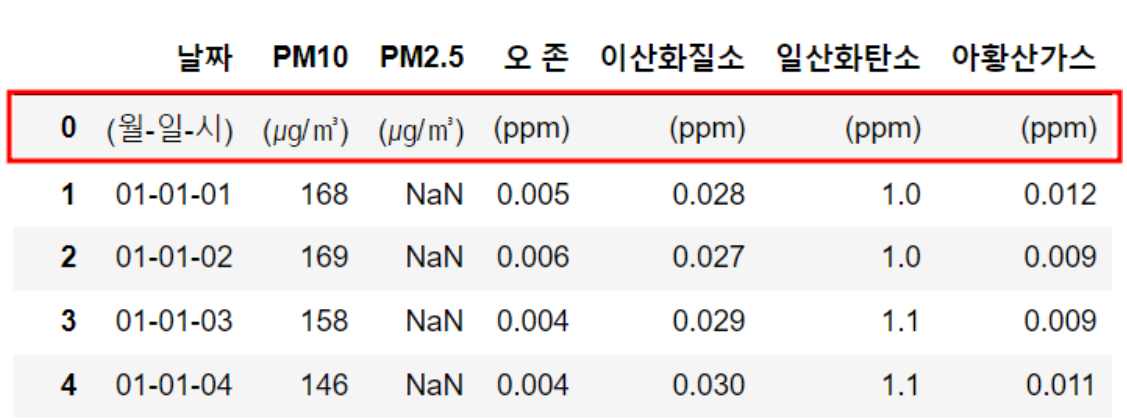

In [ ]:
# 기존 air_korea 파일의 datetime은 기상청의 datetime과 format이 달라 바꿔줘야함
# 1번째 row를 제거 후 기상청datetime format에 맞춰줌
for index in range(len(air_list)):
    df = pd.read_excel(input_path + 'air/'+air_list[index]) # 순서대로 파일 불러옴
    df.fillna(0)
    print(f'i : {index}')
    df = df.iloc[1:] # 0번째 row는 column명으로 잡혀있으므로 제거
    df['year'] = air_list[index][:4]
    print(f"year : {df['year'][5]}")
#     print(f"df['date'] : {df['date']}")

    df['datetime'] = df['year'] + '-' + df['날짜'] + ':' + '00'
#     print(f'filename: {air_list[index]}, date : {df["date"]}')
    print(f"df['datetime'] : {df['datetime'][1]}")
#     pd.to_datetime(df['datetime'])
#     df.to_csv(output_path + 'new_'+air_list[index][:-4] + '.csv', encoding='cp949')

In [ ]:
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다

for file in air_list: 
    df = pd.read_excel(input_path + 'air/'+file )
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

df_air = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.

In [ ]:
ex = pd.read_excel(input_path + 'air/'+air_list[0])
ex = ex.iloc[1:] # 위 그림 참고
ex

In [ ]:
air_list

In [ ]:
air_list[0][:-4]

In [ ]:
df

In [ ]:
df = pd.read_excel(input_path + 'air/'+air_list[0]) # 순서대로 파일 불러옴
df = df.iloc[1:] # 0번째 row는 column명으로 잡혀있으므로 제거
df['date'] = air_list[0][:4]

df['datetime_'] = df['날짜'].apply(min_add)
df['datetime'] = df['date'] + '-' + df['datetime_']

#     df.to_csv(output_path + 'new_'+air_list[0][:-4] + '.csv', encoding='cp949')

df['date'] + '-' + df['날짜'] + ':' + '00'


In [ ]:
df = pd.read_excel(input_path + 'air/'+air_list[6]) # 순서대로 파일 불러옴
df = df.iloc[1:] # 0번째 row는 column명으로 잡혀있으므로 제거
df['date'] = air_list[0][:4]


In [ ]:
df['a'] = df['date'] + '-' +df['날짜']  + ':'+'00'
pd.to_datetime(df['a'].iloc[0])

In [ ]:
air_list[4]

In [ ]:
air_list[0][:6]

In [ ]:
ex

In [ ]:
air_list

In [ ]:
type(air_list[3])

In [ ]:
air_list[0]

In [ ]:
pd.read_excel('C:/Users/DMC CONET/saeyun/data/input/air/201711.xls', header=1)

In [ ]:
output_path

In [ ]:
# copy
ex['date'] = air_list[0][:4]

def func(data):
    result = data[0:].split('-')
    result = result[0] + '-' + result[1]+ ':' + result[2]
    return result
ex['datetime'] = ex['날짜'].apply(func)
# sum_date(ex['날짜'], ex['date'])

In [ ]:
ex